## **Qmio Error Analysis.**

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from qmioanalyzer import read_data, ErrorAnalyzer, ErrorVisualizer
from matplotlib.colors import LinearSegmentedColormap

plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams["figure.figsize"] = [8.0, 5.50]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = "serif"

In [27]:
output_graphs = True

In [28]:
color_true_dark = "#CC220E"
color_true = "#DB331F"
color_true_light = "#FA9696"
color_true_light_dark = "#E37474"
color_anti_true = "#10CEE3"

color_false_dark = "#0F6FB8"
color_false = "#1F86DB"
color_false_light = "#72BAF7"
color_false_light_dark = "#599DD9"
color_anti_false = "#FF940D"


color_both_dark = "#611299"
color_both = "#8F40C7"
color_both_light = "#C397E8"
color_both_light_dark = "#9F79BD"
color_anti_both = "#16AB55"

color_0 = "#2e1e3b"


color_1 = "#413d7b"
color_1_light = "#7873BA"
color_1_light_dark = "#5A54AB"

color_2 = "#37659e"

color_3 = "#338fa7"
color_3_light = "#82C7D9"
color_3_light_dark = "#5FB8CE"


color_4 = "#41b7ad"

color_5 = "#8bdab2"
color_5_light = "#C9EEDB"
color_5_light_dark = "#A6E3C3"

color_magma_0 = "#221250"
color_magma_1 = "#5f177f"
color_magma_2 = "#982d80"
color_magma_3 = "#d3436e"
color_magma_4 = "#f8765c"
color_magma_5 = "#febb81"

## **High period circuit.**

### **3. Error distributions.**

In [29]:
bits, rep, init, backend, extra = read_data("data/high_period_32_qubits_25_s_20251002_213055.txt")

In [30]:
print("Bitstrings:", bits[:5])     # first 5 measured states
print("Repetition period:", rep)
print("Init state:", init)
print("Backend:", backend)
print("Batch IDs:", extra.get("batch"))
print("Shot IDs:", extra.get("shot"))
print("Abs times:", extra.get("abstime"))


Bitstrings: ['11111111111111101111110111110111' '01100111111111001111111011110111'
 '11111110111111011111111111011110' '01111111101111101111100011100111'
 '10111111111111111111100101110111']
Repetition period: 0.00015
Init state: 1
Backend: qmio
Batch IDs: [ 1  1  1 ... 22 22 22]
Shot IDs: [     1      2      3 ... 180222 180223 180224]
Abs times: [ 3.787926  3.787926  3.787926 ... 84.330079 84.330079 84.330079]


In [31]:
errors_obj = ErrorAnalyzer(repetition_period = rep, init_state = init, measurements = bits, verbose=2)
errors_dict_high = errors_obj.get_errors()

The analysis was performed using the *high repetition period* approach 
(repetition_period ≥ 1.4999999999999997e-10 μs). The error dictionary contains:

- Key: 'high_period_errors' → Returns two arrays with 180224 measurements:
  - 'error_counts': Array with the number of errors associated with each measurement.
  - 'times': Array with the times of each measurement (calculated as i * repetition_period).




In [32]:
states_high = errors_dict_high["high_period_errors"]["states"]
total_errors_high = errors_dict_high['high_period_errors']['total_errors']
times_high = errors_dict_high['high_period_errors']['times']

print('number of total errors:',sum(total_errors_high))


number of total errors: 1067361


In [33]:
print(times_high[:5], times_high[-5:])
print(extra.get("abstime")[1:5], extra.get("abstime")[-5:])

[0.0, 0.00015, 0.0003, 0.00045, 0.0006] [27.032849999999996, 27.032999999999998, 27.03315, 27.033299999999997, 27.03345]
[3.787926 3.787926 3.787926 3.787926] [84.330079 84.330079 84.330079 84.330079 84.330079]


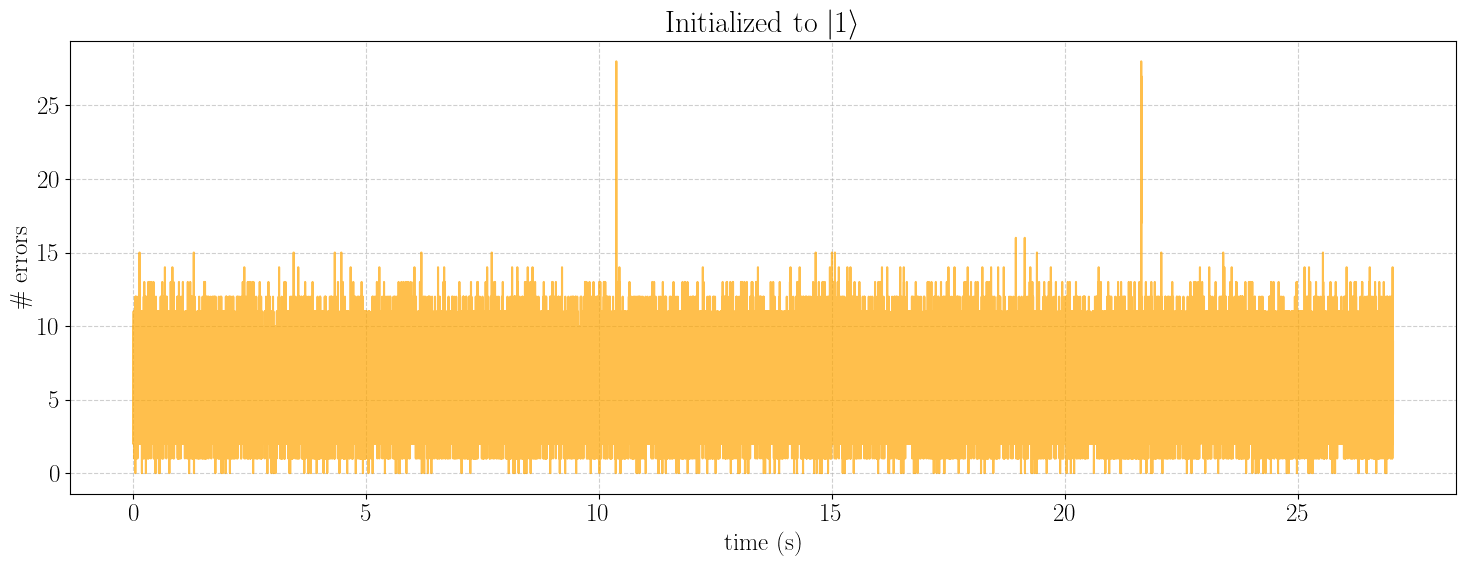

In [34]:
plt.figure(figsize=(15,6))

plt.plot(times_high, total_errors_high, '-', color = 'orange', markersize=3, alpha=0.7)

plt.xlabel("time (s)")
plt.ylabel(r"\# errors")
plt.grid(True, linestyle='--', alpha=0.6)
plt.title(r'Initialized to $|1\rangle$')

plt.tight_layout()
plt.show()

mean number of errors: 5.9223837531905446
Variance: 0.4719
Standard deviation: 0.6869
Threshold (5σ): 9.3571


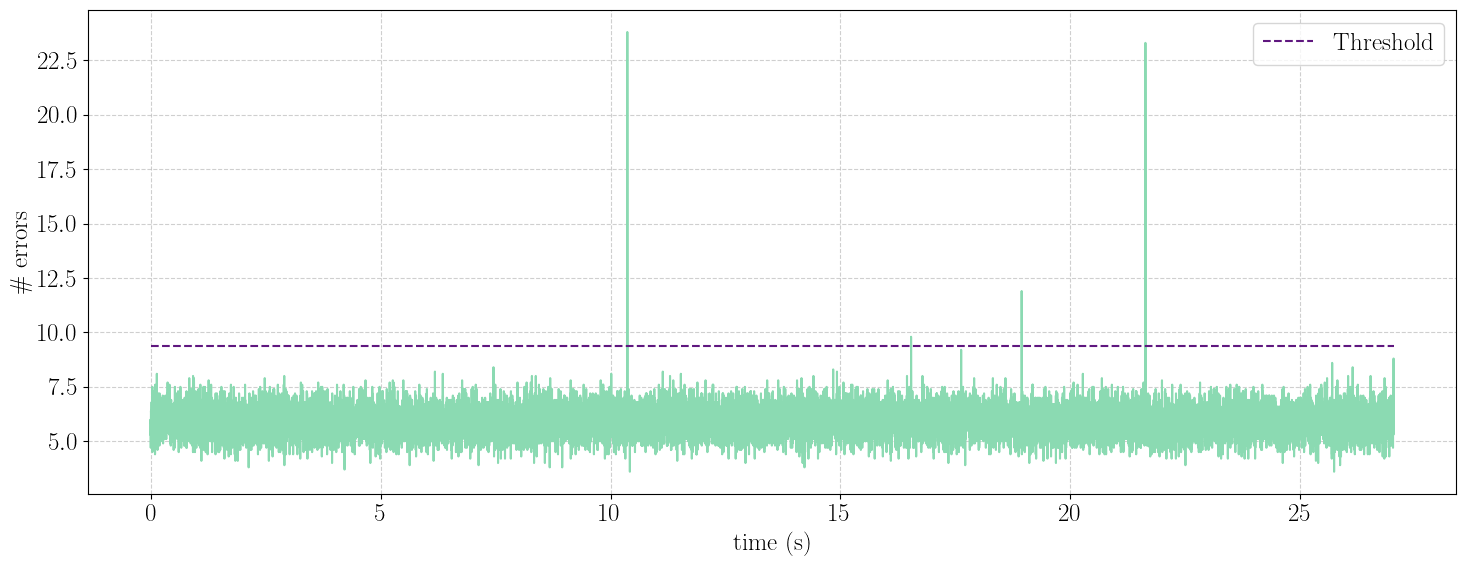

In [35]:
# Example: group every 6 points
bin_size = 10

# convert to arrays
times_high = np.array(times_high)
total_errors_high = np.array(total_errors_high)

# number of full bins
n_bins = len(total_errors_high) // bin_size

# reshape and take mean
binned_times = times_high[:n_bins*bin_size].reshape(n_bins, bin_size).mean(axis=1)
binned_errors = total_errors_high[:n_bins*bin_size].reshape(n_bins, bin_size).mean(axis=1)

baseline = np.mean(binned_errors)  # or np.median(binned_errors)
signal = binned_errors - baseline  # subtract baseline
print('mean number of errors:', baseline)

variance = np.var(binned_errors, ddof=1)  # sample variance
std_dev = np.sqrt(variance)
print(f"Variance: {variance:.4f}")
print(f"Standard deviation: {std_dev:.4f}")

# optionally clip negatives to zero (if you only care about positive peaks)
#signal = np.clip(signal, 0, None)
k = 5
threshold_real = baseline + k * std_dev
print(f"Threshold ({k}σ): {threshold_real:.4f}")

# plot
plt.figure(figsize=(15,6))
plt.plot(binned_times, binned_errors, '-', color=color_5)
plt.hlines(y=threshold_real, xmin=binned_times[0], xmax=binned_times[-1], color=color_magma_1, linestyle='--', label='Threshold')
plt.legend()
plt.xlabel("time (s)")
plt.ylabel(r"\# errors")
plt.grid(True, linestyle='--', alpha=0.6)
if output_graphs:  
    plt.savefig("errors_time_high_1_good.pdf", format='pdf')
plt.show()

mean number of errors: 5.9223837531905446


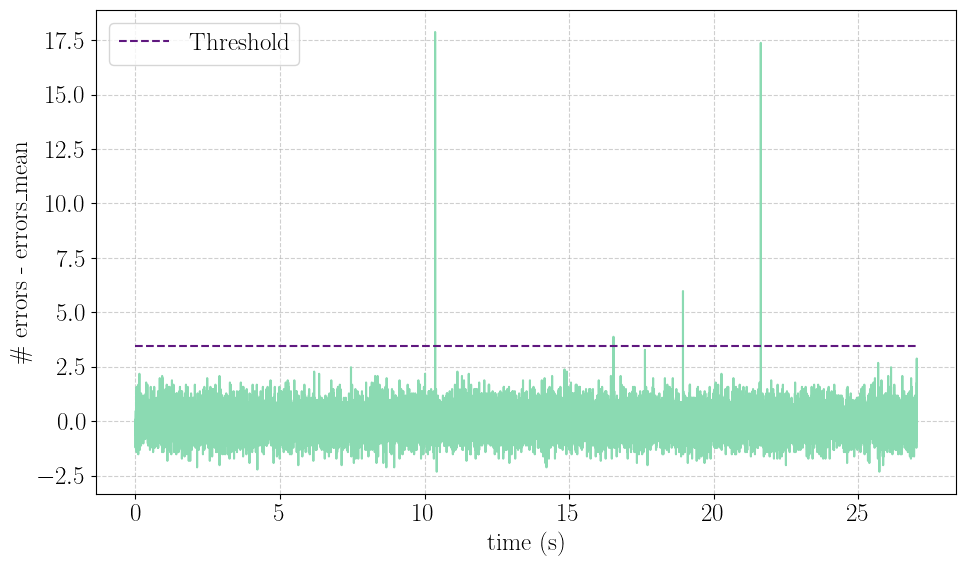

In [36]:
# assume binned_times, binned_errors from previous step
# ---------------- BASELINE ----------------
baseline = np.mean(binned_errors)  # or np.median(binned_errors)
signal = binned_errors - baseline  # subtract baseline
print('mean number of errors:', baseline)

# optionally clip negatives to zero (if you only care about positive peaks)
threshold = threshold_real - baseline

# ---------------- PLOT ----------------
plt.figure(figsize=(10,6))
plt.plot(binned_times, signal, '-', color=color_5)
plt.xlabel("time (s)")
plt.ylabel(r"\# errors - errors\_mean")
plt.hlines(y=threshold, xmin=binned_times[0], xmax=binned_times[-1], color=color_magma_1, linestyle='--', label='Threshold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
if output_graphs:  
    plt.savefig("errors_time_high_1_32.pdf", format='pdf')
plt.show()

Found 6 candidate peaks
Peak at t = 10.366 s


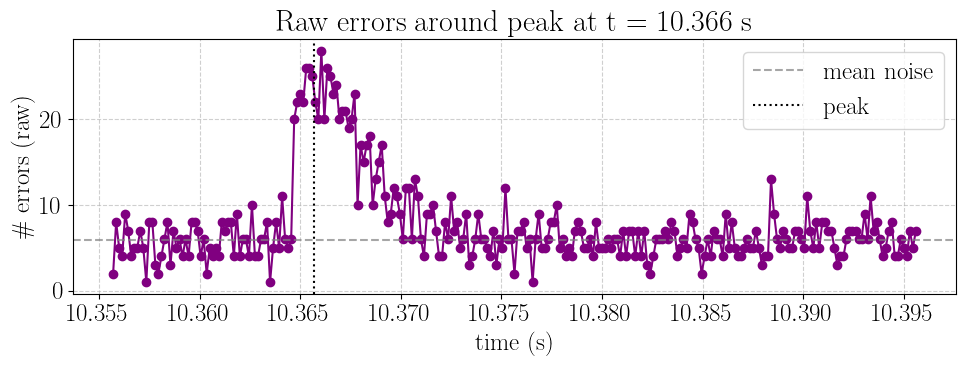

Peak at t = 10.369 s


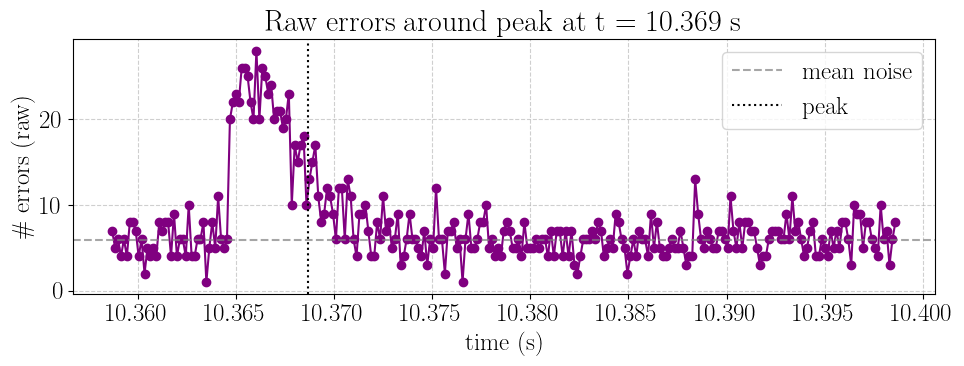

Peak at t = 16.535 s


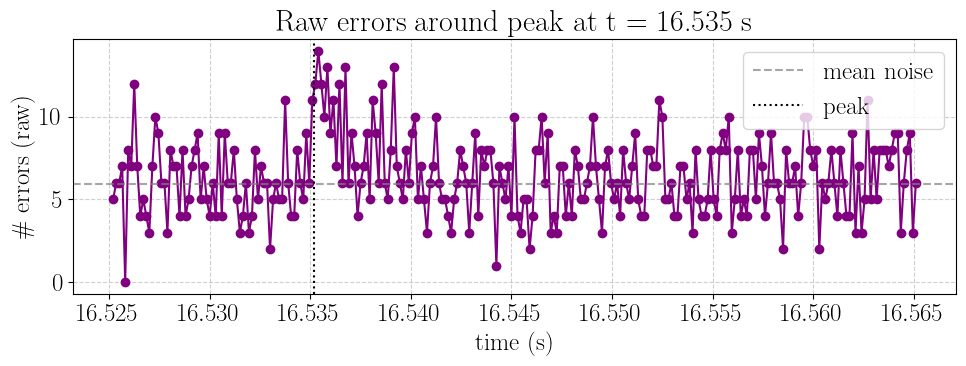

Peak at t = 18.940 s


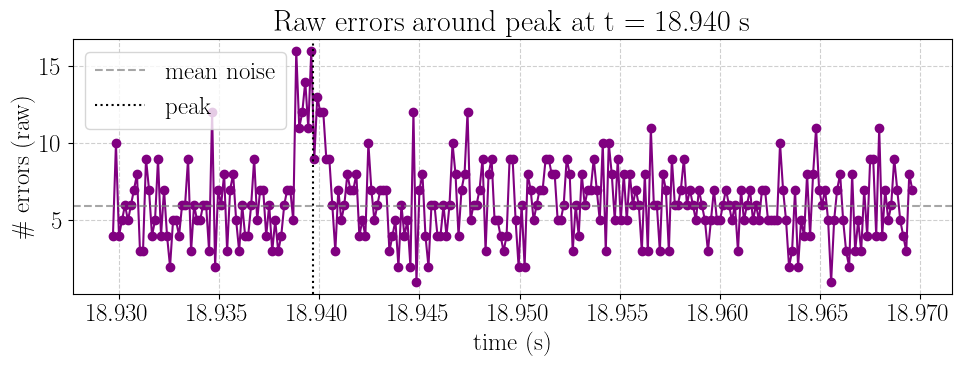

Peak at t = 21.631 s


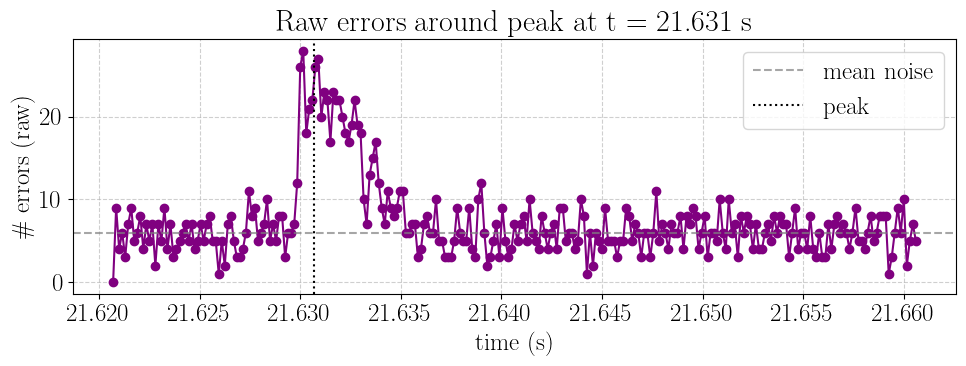

Peak at t = 21.634 s


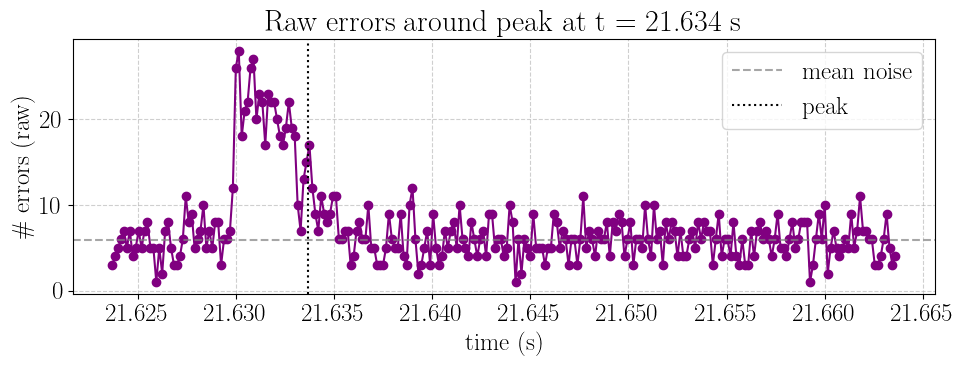

In [37]:
# ---------------- PARAMETERS ----------------
threshold = threshold_real - baseline
window_before = 0.01  # seconds
window_after  = 0.03  # seconds

# ---------------- FIND PEAKS ON BINNED SIGNAL ----------------
peak_indices = np.where(signal > threshold)[0]

# avoid duplicates if consecutive bins are above threshold
selected_peaks = []
for idx in peak_indices:
    if not selected_peaks or (idx - selected_peaks[-1]) > 1:
        selected_peaks.append(idx)

print(f"Found {len(selected_peaks)} candidate peaks")
peaks_t = []

# ---------------- EXTRACT FROM RAW DATA ----------------
for peak_idx in selected_peaks:
    t_peak = binned_times[peak_idx]
    print(f"Peak at t = {t_peak:.3f} s")
    peaks_t.append(t_peak)
    
    # define window in raw times
    t_min = t_peak - window_before
    t_max = t_peak + window_after
    
    # mask on raw data
    mask = (times_high >= t_min) & (times_high <= t_max)

    #plot raw errors around peak
    plt.figure(figsize=(10,4))
    plt.plot(times_high[mask], total_errors_high[mask], 'o-', color='purple')
    plt.axhline(np.mean(total_errors_high), color='gray', linestyle='--', alpha=0.7, label="mean noise")
    plt.axvline(t_peak, color='black', linestyle=':', label="peak")
    plt.xlabel("time (s)")
    plt.ylabel(r"\# errors (raw)")
    plt.title(f"Raw errors around peak at t = {t_peak:.3f} s")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [38]:
print(peaks_t)

[np.float64(10.365674999999998), np.float64(10.368675), np.float64(16.535175), np.float64(18.939675), np.float64(21.630675), np.float64(21.633675)]


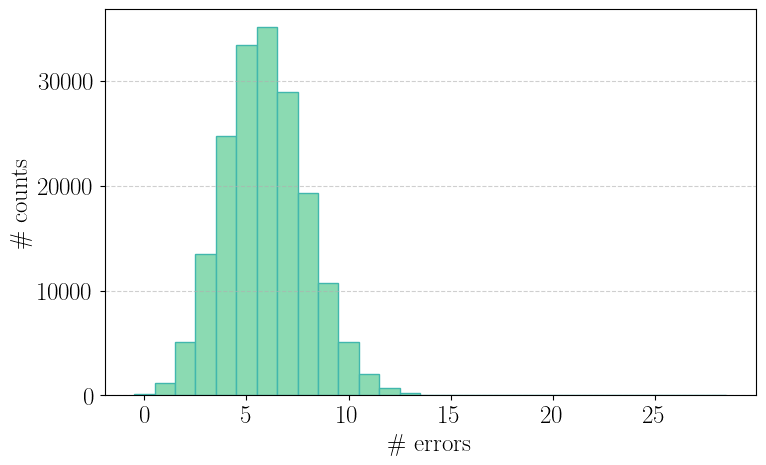

In [39]:
plt.figure(figsize=(8,5))
plt.hist(total_errors_high, bins=range(max(total_errors_high) + 2), align='left', color=color_5, edgecolor=color_4)
plt.xlabel(r"\# errors")
plt.ylabel(r"\# counts")
plt.grid(axis='y', linestyle='--', alpha=0.6)
if output_graphs:  
    plt.savefig("error_histogram_high_1.pdf", format='pdf')
plt.show()

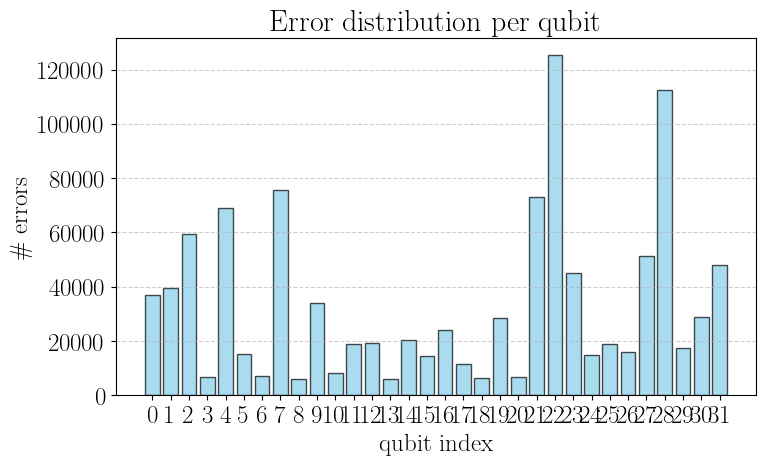

In [40]:
errors_per_qubit = errors_dict_high["high_period_errors"]["errors_per_qubit"]

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(range(len(errors_per_qubit)), errors_per_qubit, color='skyblue', alpha=0.7, edgecolor='black')

# Etiquetas
plt.xlabel("qubit index")
plt.ylabel(r"\# errors")
plt.title("Error distribution per qubit")
plt.xticks(range(len(errors_per_qubit)))  # Marcamos los qubits en el eje X
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## **Possible cosmic ray impact ?**

In [41]:
# center index

t_peaks = [np.float64(10.3645), np.float64(16.535), np.float64(18.939), np.float64(21.630)]
do_fit = [True, True, True, True, True, True]

In [42]:
# --- Exponential decay model (same as before) ---
def exp_decay_peak(t, A, tau, B, t0):
    return np.where(t >= t0, A * np.exp(-(t - t0) / tau) + B, B)

In [43]:
results_high = {}

window_low = -0.01  # seconds before peak

for idx, t_central in enumerate(t_peaks):

    errors_obj_restricted = ErrorAnalyzer(
        repetition_period = rep,
        init_state = init,
        measurements = bits,
        verbose=0,
        threshold=0.000120,
        center_time = t_central,
        window = (window_low, 0.015)
    )
    errors_dict = errors_obj_restricted.get_errors()

    total_errors = np.array(errors_dict['high_period_errors']['total_errors'])
    times_data = np.array(errors_dict['high_period_errors']['times'])

    # --- If fit is disabled, just plot the raw data ---
    if not do_fit[idx]:
        print(f"Event {idx}: skipped fit, only plotting data.")
        
        plt.figure(figsize=(7,6))
        plt.plot(times_data, total_errors, '-', color=color_5, linewidth=1, alpha=0.9)
        plt.vlines(t_central, ymin=total_errors.min(), ymax=total_errors.max(),
                   color=color_magma_4, linestyles='dashed', linewidth=1.5, label="Impact time")
        plt.xlabel("time (s)")
        plt.ylabel(r"\# errors")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        if output_graphs:
            plt.savefig(f"cr_high_32_{idx}.pdf", format='pdf')
        plt.close()
        continue

    # --- Fit is enabled ---
    mask = (times_data > t_central) & (times_data < t_central + 0.02)
    t_fit_data = times_data[mask]
    y_fit_data = total_errors[mask]

    if len(t_fit_data) < 5:
        print(f"Skipping index {idx}, not enough points in window.")
        continue

    try:
        popt, pcov = curve_fit(
            lambda t, A, tau, B: exp_decay_peak(t, A, tau, B, t_central),
            t_fit_data, y_fit_data,
            p0=[max(y_fit_data), 0.005, min(y_fit_data)],
            maxfev=20000
        )
        A, tau, B = popt
        dA, dtau, dB = np.sqrt(np.diag(pcov))

        # chi-square
        residuals = y_fit_data - exp_decay_peak(t_fit_data, A, tau, B, t_central)
        chi2 = np.sum(residuals**2)
        dof = len(y_fit_data) - len(popt)
        chi2_red = chi2 / dof if dof > 0 else np.nan

        results_high[idx] = (tau, dtau, chi2, dof, chi2_red)

        # --- Plot with fit ---
        plt.figure(figsize=(7,6))
        plt.plot(times_data, total_errors, '-', color=color_5, linewidth=1, alpha=0.9)
        t_fit_line = np.linspace(t_central, t_central + 0.015, 500)
        plt.plot(t_fit_line, exp_decay_peak(t_fit_line, A, tau, B, t_central),
                 color=color_magma_1, linewidth=2, label="Exponential fit")
        plt.vlines(t_central, ymin=total_errors.min(), ymax=total_errors.max()+0.9,
                   color=color_magma_1, linestyles='dashed', linewidth=2, label="Impact time")
        plt.xlabel("time (s)")
        plt.ylabel(r"\# errors")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        if output_graphs:
            plt.savefig(f"cr_high_32_{idx}.pdf", format='pdf')
        plt.close()

        # --- Print results ---
        print(f"Event {idx}: t0 = {t_central:.3f} s")
        print(f"   τ = {tau*1000:.2f} ± {dtau*1000:.2f} ms")
        print(f"   χ² = {chi2:.2f}, dof = {dof}, χ²_red = {chi2_red:.2f}")

    except RuntimeError:
        print(f"Fit did not converge for event {idx}.")

Event 0: t0 = 10.364 s
   τ = 5.76 ± 1.22 ms
   χ² = 1306.10, dof = 97, χ²_red = 13.46
Event 1: t0 = 16.535 s
   τ = 2.16 ± 0.67 ms
   χ² = 482.52, dof = 97, χ²_red = 4.97
Event 2: t0 = 18.939 s
   τ = 1.01 ± 0.30 ms
   χ² = 521.82, dof = 97, χ²_red = 5.38
Event 3: t0 = 21.630 s
   τ = 3.16 ± 0.39 ms
   χ² = 851.05, dof = 97, χ²_red = 8.77


Selected measurements: 133


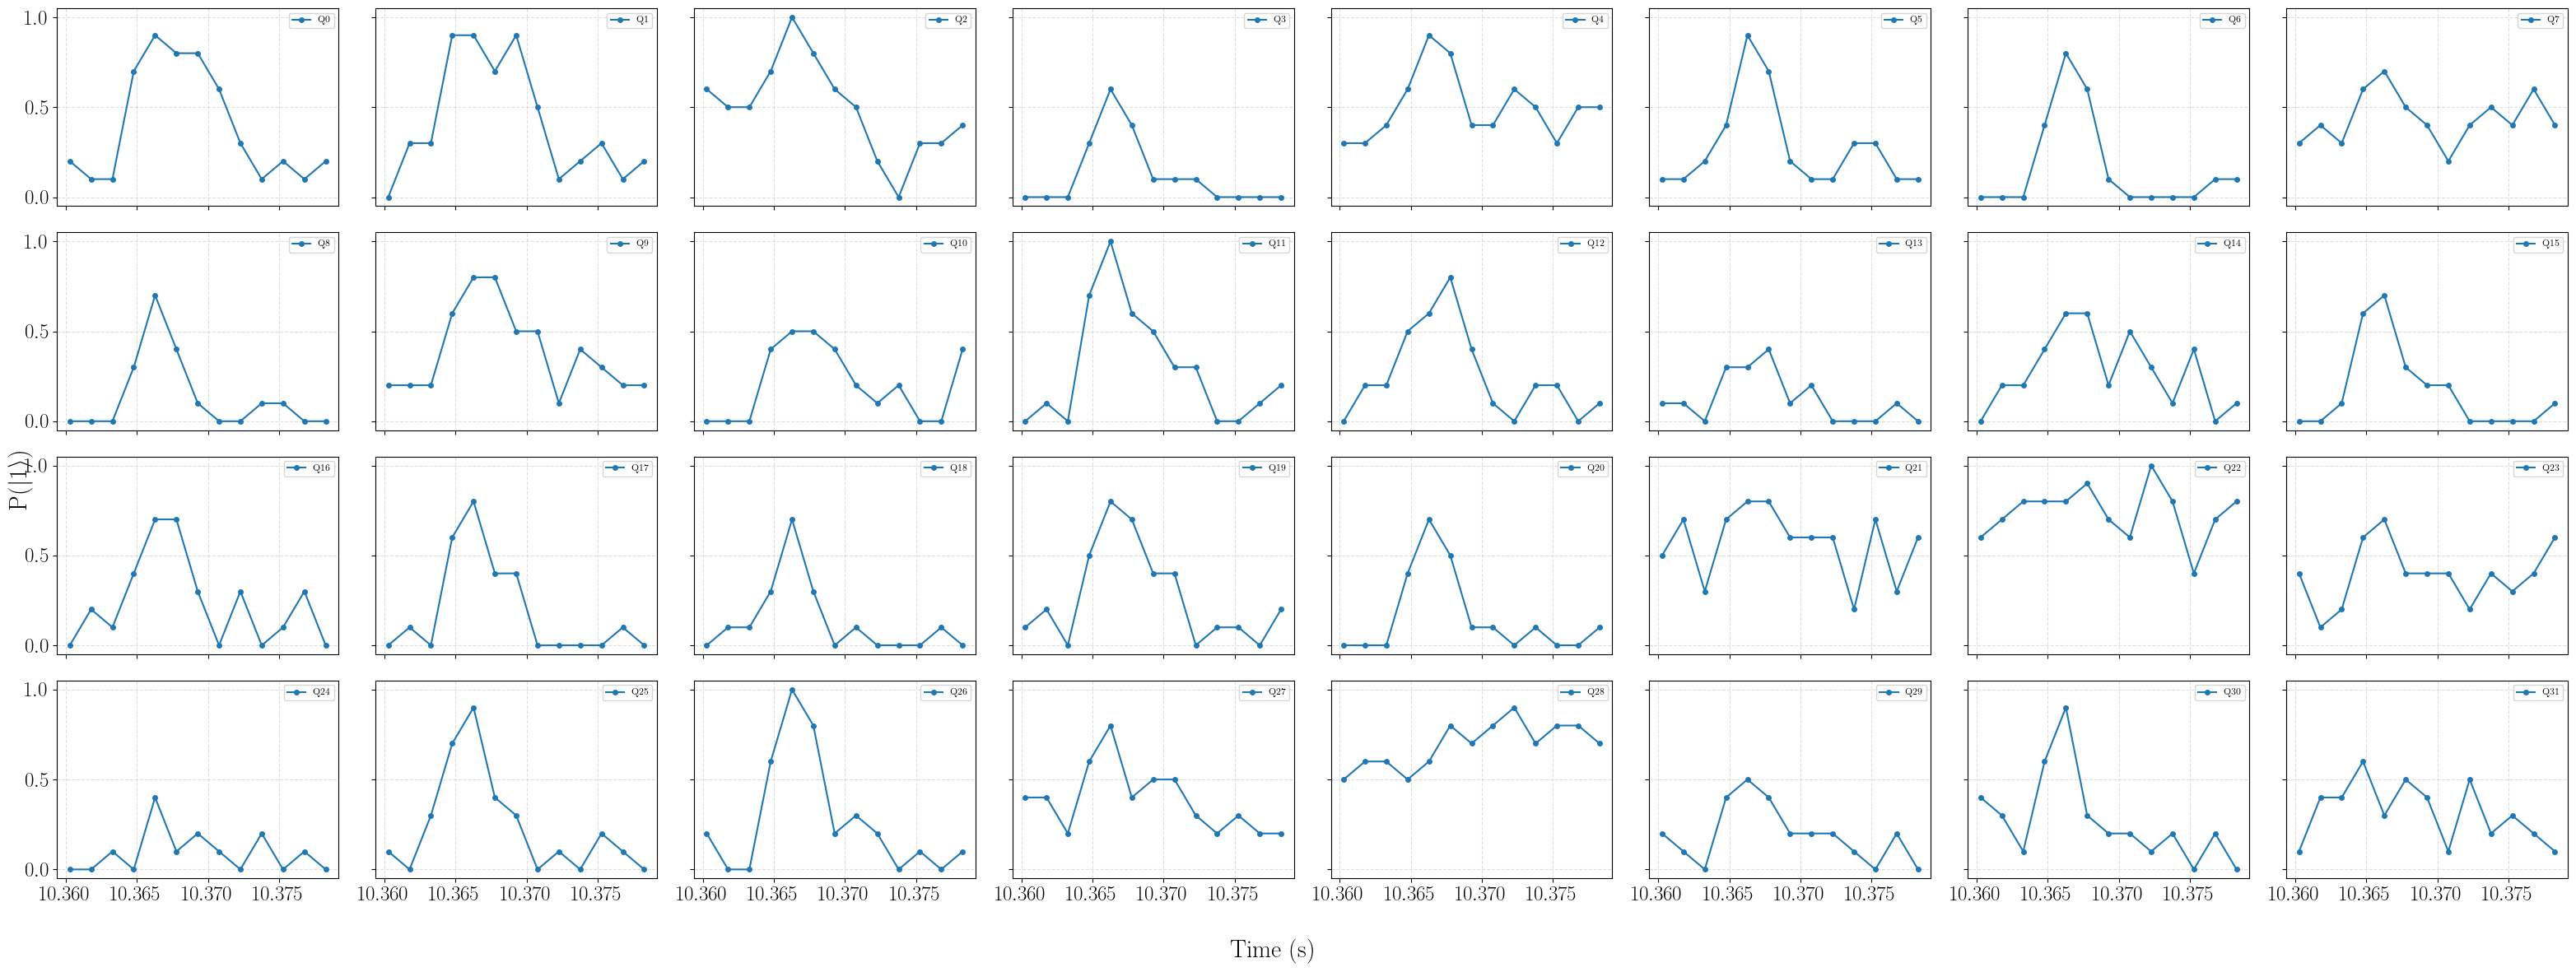

In [44]:
center = 10.3645
# choose window and bin_size as needed
window = (-0.005, 0.015)
bin_size = 10



# Option A: get all qubits in one call (returns times_bin, p_qubits_bin (n_bins, n_qubits))
times_bin, p_qubits_bin = errors_obj.get_qubit_error_probabilities(center_time=center,
                                                                  window=window,
                                                                  bin_size=bin_size,
                                                                  qubit=None)

# If user called single-qubit version it may return 1D -> make 2D
if p_qubits_bin.ndim == 1:
    p_qubits_bin = p_qubits_bin[:, None]

n_qubits = p_qubits_bin.shape[1]

# layout
cols = 8
rows = int(np.ceil(n_qubits / cols))
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 3*rows), sharex=True, sharey=True)
axes = np.array(axes).reshape(-1)

for q in range(n_qubits):
    ax = axes[q]
    p_q = p_qubits_bin[:, q]
    # valid points
    mask = np.isfinite(p_q)
    if mask.sum() == 0:
        ax.text(0.5, 0.5, "no data", ha="center", va="center")
        continue

    t = times_bin[mask]
    y = p_q[mask]

    # plotting data points
    ax.plot(t, y, "o-", markersize=4, label=f"Q{q}")

    # fit only if enough points
    if len(t) >= 3:
        try:
            # model: A*exp(-(t-center)/tau) + B, fit over t (use shift to keep tau positive)
            def model(t, A, tau, B):
                return A * np.exp(-(t - center) / tau) + B

            # p0 = [max(y) - min(y), 0.005, min(y)]
            # popt, _ = curve_fit(model, t, y, p0=p0, maxfev=20000)
            # A, tau, B = popt
            # label = r"$\tau={:.1f}\ \mathrm{{ms}}$".format(tau*1000)
            # ax.plot(t_fit, model(t_fit, *popt), "r-", linewidth=1.5, label=label)
        except Exception:
            pass

    ax.legend(fontsize=8)
    ax.grid(True, linestyle="--", alpha=0.4)

# hide unused axes
for a in axes[n_qubits:]:
    a.set_visible(False)

fig.supylabel(r"P($|1\rangle$)")
fig.supxlabel("Time (s)")
plt.tight_layout()
plt.show()
